# Import modules 

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
#import xgboost as xgb

# Implementing metrics

## Mean Squared Error
$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

In [2]:
# Mean Squared Error
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

## Root Mean Squared Error
$$RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$

In [3]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

## Mean Absolute Error
$$MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$$

In [4]:
# Mean Absolute Error
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

## Relative Absolute Error
$$RSE = \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$

In [5]:
# Relative Absolute Error
def relative_absolute_error(y_true, y_pred):
    numerator = np.sum(np.abs(y_true - y_pred))
    denominator = np.sum(np.abs(y_true - np.mean(y_true)))
    return numerator / denominator

## Residual Standard Error
$$RAE = \frac{\sum_{i=1}^{n} |y_i - \hat{y}_i|}{\sum_{i=1}^{n} |y_i - \bar{y}|}$$

In [6]:
# Residual Standard Error
def residual_standard_error(y_true, y_pred):
    residual_sum_of_squares = np.sum((y_true - y_pred) ** 2)
    degrees_of_freedom = len(y_true) - 2
    return np.sqrt(residual_sum_of_squares / degrees_of_freedom)

## Mean absolute percentage error
$$MAPE = \frac{1}{n} \sum_{i=1}^{n} \left|\frac{y_i - \hat{y}_i}{y_i}\right| \times 100\%$$

In [7]:
# Mean absolute percentage error
def mean_absolute_percentage_error(y, y_hat):
    mape = np.mean(np.abs((y - y_hat) / y)) * 100
    return mape

## correlation coefficient
$$R = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2 \sum_{i=1}^{n} (y_i - \bar{y})^2}}$$

In [8]:
# correlation coefficient
def correlation_coefficient(y, y_hat):
    y_mean = np.mean(y)
    y_hat_mean = np.mean(y_hat)
    numerator = np.sum((y - y_mean) * (y_hat - y_hat_mean))
    denominator = np.sqrt(np.sum((y - y_mean) ** 2) * np.sum((y_hat - y_hat_mean) ** 2))
    r = numerator / denominator
    return r

## R-squared
$$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$

In [9]:
# R-squared
def r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

# Load data from Yahoo Finance API 

In [10]:
sbux_data = yf.download('SBUX', period='5y')

[*********************100%%**********************]  1 of 1 completed


In [11]:
sbux_data.drop(columns=['Adj Close'], inplace=True)
sbux_data.reset_index(inplace=True)
sbux_data.head()

,Date,Open,High,Low,Close,Volume
0,2019-06-05,78.790001,79.970001,78.660004,79.959999,7437100
1,2019-06-06,80.029999,81.629997,79.900002,81.400002,10457200
2,2019-06-07,81.599998,83.330002,81.510002,82.480003,11278800
3,2019-06-10,82.849998,82.860001,81.379997,81.930000,8102800
4,2019-06-11,82.300003,82.860001,81.849998,82.370003,6226400


In [12]:
sbux_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1259 non-null   datetime64[ns]
 1   Open    1259 non-null   float64       
 2   High    1259 non-null   float64       
 3   Low     1259 non-null   float64       
 4   Close   1259 non-null   float64       
 5   Volume  1259 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 59.1 KB


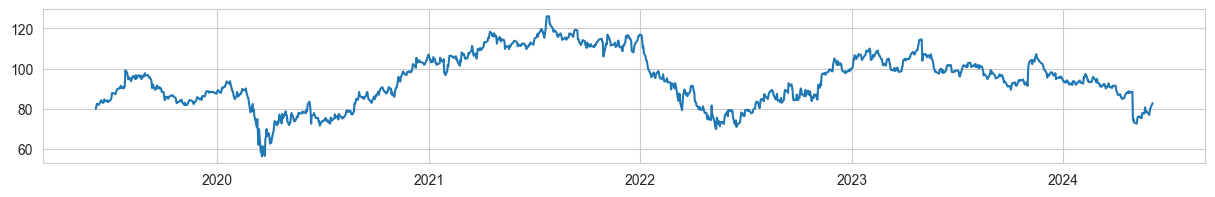

In [13]:
plt.figure(figsize=(15,2))
plt.plot(sbux_data['Date'], sbux_data['Close'])

In [14]:
sbux_data[(sbux_data['Date'].dt.strftime('%Y') == '2023')]

,Date,Open,High,Low,Close,Volume
902,2023-01-03,100.559998,101.169998,99.470001,100.830002,6607700
903,2023-01-04,102.690002,104.730003,102.550003,104.459999,8166600
904,2023-01-05,104.489998,105.099998,103.489998,104.430000,5575100
905,2023-01-06,105.379997,107.000000,105.010002,106.690002,9644100
906,2023-01-09,106.519997,106.680000,104.430000,104.739998,10124800
...,...,...,...,...,...,...
1147,2023-12-22,94.889999,95.830002,94.339996,95.279999,6360400
1148,2023-12-26,95.339996,95.690002,94.959999,95.669998,3709500
1149,2023-12-27,95.690002,95.779999,94.790001,95.290001,4959300
1150,2023-12-28,95.500000,95.970001,95.110001,95.930000,4518300


# Split data into train and test

In [15]:
X_train =  sbux_data[(sbux_data['Date'] >= pd.to_datetime('2022-01-01')) & (sbux_data['Date'] < pd.to_datetime('2024-03-03'))].copy()
X_test =  sbux_data[(sbux_data['Date'] >= pd.to_datetime('2024-03-01'))  & (sbux_data['Date'] < pd.to_datetime('2024-06-01'))].copy()

X_train.reset_index(drop = True, inplace=True)
X_test.reset_index(drop = True, inplace=True)

print(X_train.shape, X_test.shape)

(543, 6) (64, 6)


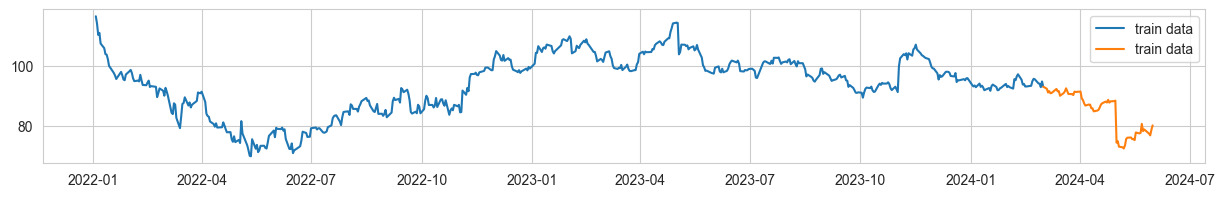

In [16]:
plt.figure(figsize=(15,2))
plt.plot(X_train['Date'], X_train['Close'], label='train data')
plt.plot(X_test['Date'], X_test['Close'], label='train data')
plt.legend(loc='best')

# Make data chunks

## Example of index of data chunks

In [17]:
end_value = X_test.shape[0]
window_size = 7
padding = 1

chunks = []
labels = []
for start in tqdm(range(0, ((end_value-window_size)+1)-1, padding), desc='Making chunks for each word thought'):
    end = start + window_size
    
    #With those limits index create the windows
    chunks.append([start, end])
    labels.append(end+1)
        
print(chunks, len(chunks))
print(labels, len(labels))

Making chunks for each word thought: 100%|██████████| 57/57 [00:00<?, ?it/s]

[[0, 7], [1, 8], [2, 9], [3, 10], [4, 11], [5, 12], [6, 13], [7, 14], [8, 15], [9, 16], [10, 17], [11, 18], [12, 19], [13, 20], [14, 21], [15, 22], [16, 23], [17, 24], [18, 25], [19, 26], [20, 27], [21, 28], [22, 29], [23, 30], [24, 31], [25, 32], [26, 33], [27, 34], [28, 35], [29, 36], [30, 37], [31, 38], [32, 39], [33, 40], [34, 41], [35, 42], [36, 43], [37, 44], [38, 45], [39, 46], [40, 47], [41, 48], [42, 49], [43, 50], [44, 51], [45, 52], [46, 53], [47, 54], [48, 55], [49, 56], [50, 57], [51, 58], [52, 59], [53, 60], [54, 61], [55, 62], [56, 63]] 57
[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64] 57


In [18]:
X_train

,Date,Open,High,Low,Close,Volume
0,2022-01-03,116.470001,117.800003,114.779999,116.680000,5475700
1,2022-01-04,116.900002,117.050003,114.169998,114.239998,8367600
2,2022-01-05,114.400002,114.959999,110.400002,110.440002,8662300
3,2022-01-06,110.000000,111.879997,109.989998,111.139999,6099900
4,2022-01-07,108.220001,109.709999,107.480003,107.570000,11266400
...,...,...,...,...,...,...
538,2024-02-26,95.360001,95.570000,94.250000,94.279999,7043800
539,2024-02-27,94.320000,94.660004,93.599998,94.129997,5356100
540,2024-02-28,93.769997,93.970001,92.769997,93.000000,5622400
541,2024-02-29,94.500000,95.099998,93.980003,94.900002,11221100


In [19]:
def split_data_into_chunks(data, window_size = 7, offset = 1):
    end_value = data.shape[0]
    
    date = data['Date']
    data.drop(columns=['Date'], inplace=True)
    
    chunks = []
    labels = []
    date_7_days = []
    for start in tqdm(range(0, ((end_value-window_size)+1)-2, offset), desc='Making chunks'):
        end = start + window_size
        
        #With those limits index create the windows
        chunks.append(data[start:end])
        labels.append(data['Close'][end+1])
        date_7_days.append(date[end+1])
    #return  np.array(chunks).transpose(0,2,1), np.array(labels)
    return  np.array(chunks), np.array(labels), date_7_days

In [20]:
X_train_chunk, y_train, date_train = split_data_into_chunks(X_train.copy(), window_size = 7, offset = 1)
X_test_chunk, y_test, date_test = split_data_into_chunks(X_test.copy(), window_size = 7, offset = 1)

Making chunks: 100%|██████████| 56/56 [00:00<00:00, 18718.60it/s]


In [21]:
print(X_train_chunk.shape, y_train.shape, len(date_train))
print(X_test_chunk.shape, y_test.shape, len(date_test))

(535, 7, 5) (535,) 535
(56, 7, 5) (56,) 56


# Regressors
Store the regressors in a dict to iterate them

In [22]:
regressors = {'RandomForestReg' : RandomForestRegressor(n_estimators = 1000),
              'GradientBoostingReg' : GradientBoostingRegressor(),
              'ExtraTreesReg' : ExtraTreesRegressor(n_estimators=1000),
              }

# Metrics functions as a dict
Store the functions in a dict to call the in a iterative way

In [23]:
metrics_functions = {'MSE' : mean_squared_error,
                     'RMSE' : rmse,
                     'MAE' : mean_absolute_error,
                     'RSE' : residual_standard_error,
                     'RAE' : relative_absolute_error,
                     'R' : correlation_coefficient,
                     'R2' : r_squared,}

# Metrics calculated
In this dict will be saved the metrics for each regressor, it is a dict to iterate over it in the loop when fitting and predicting
This dict will be used to create a dataframe and show the final results

In [24]:
metrics_calculated = {'Regressors' : regressors.keys(),
           'MSE' : [],
           'RMSE' : [],
           'MAE' : [],
           'RSE' : [],
           'RAE' : [],
           'R' : [],
           'R2' : [],
           }

# Perform fit and predict

In [25]:
labels_per_regressor = {}

# Flatten data
X_train_flatten = X_train_chunk.reshape(X_train_chunk.shape[0], -1, order = 'C')
X_test_flatten = X_test_chunk.reshape(X_test_chunk.shape[0], -1, order = 'C')

# Standardise data
scaler = StandardScaler()
X_train_flatten = scaler.fit_transform(X_train_flatten)
X_test_flatten = scaler.transform(X_test_flatten)

for regressor_name, regressor in tqdm(regressors.items()):
    
    #train the regressor model
    regressor.fit(X_train_flatten, y_train)
    #make predictions
    labels_pred = regressor.predict(X_test_flatten)
    #store those predictions on the dictionary using the current regressor model name as the key
    labels_per_regressor[regressor_name] = labels_pred
    
    
    #calculate and store metrics for actual labels values vs the predicted ones, also round the value to avoid several decimals
    for metric_name, metric_function in metrics_functions.items():
        metric_calculated = np.round(metrics_functions[metric_name](y_test, labels_pred), 4)
        metrics_calculated[metric_name].append(metric_calculated)

100%|██████████| 3/3 [00:35<00:00, 11.85s/it]


In [30]:
#metrics['Regressors'] = regressors.keys() 
df_metrics = pd.DataFrame(metrics_calculated)
df_metrics

,Regressors,MSE,RMSE,MAE,RSE,RAE,R,R2
0,RandomForestReg,9.3248,3.0536,1.8943,3.1097,0.3196,0.8937,0.7766
1,GradientBoostingReg,9.9376,3.1524,2.0485,3.2102,0.3456,0.8849,0.7619
2,ExtraTreesReg,10.0371,3.1681,1.9052,3.2263,0.3215,0.8845,0.7595


# Plot

100%|██████████| 3/3 [00:00<00:00, 861.67it/s]
C:\Users\edfli\AppData\Local\Temp\ipykernel_19736\2679557702.py:38: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


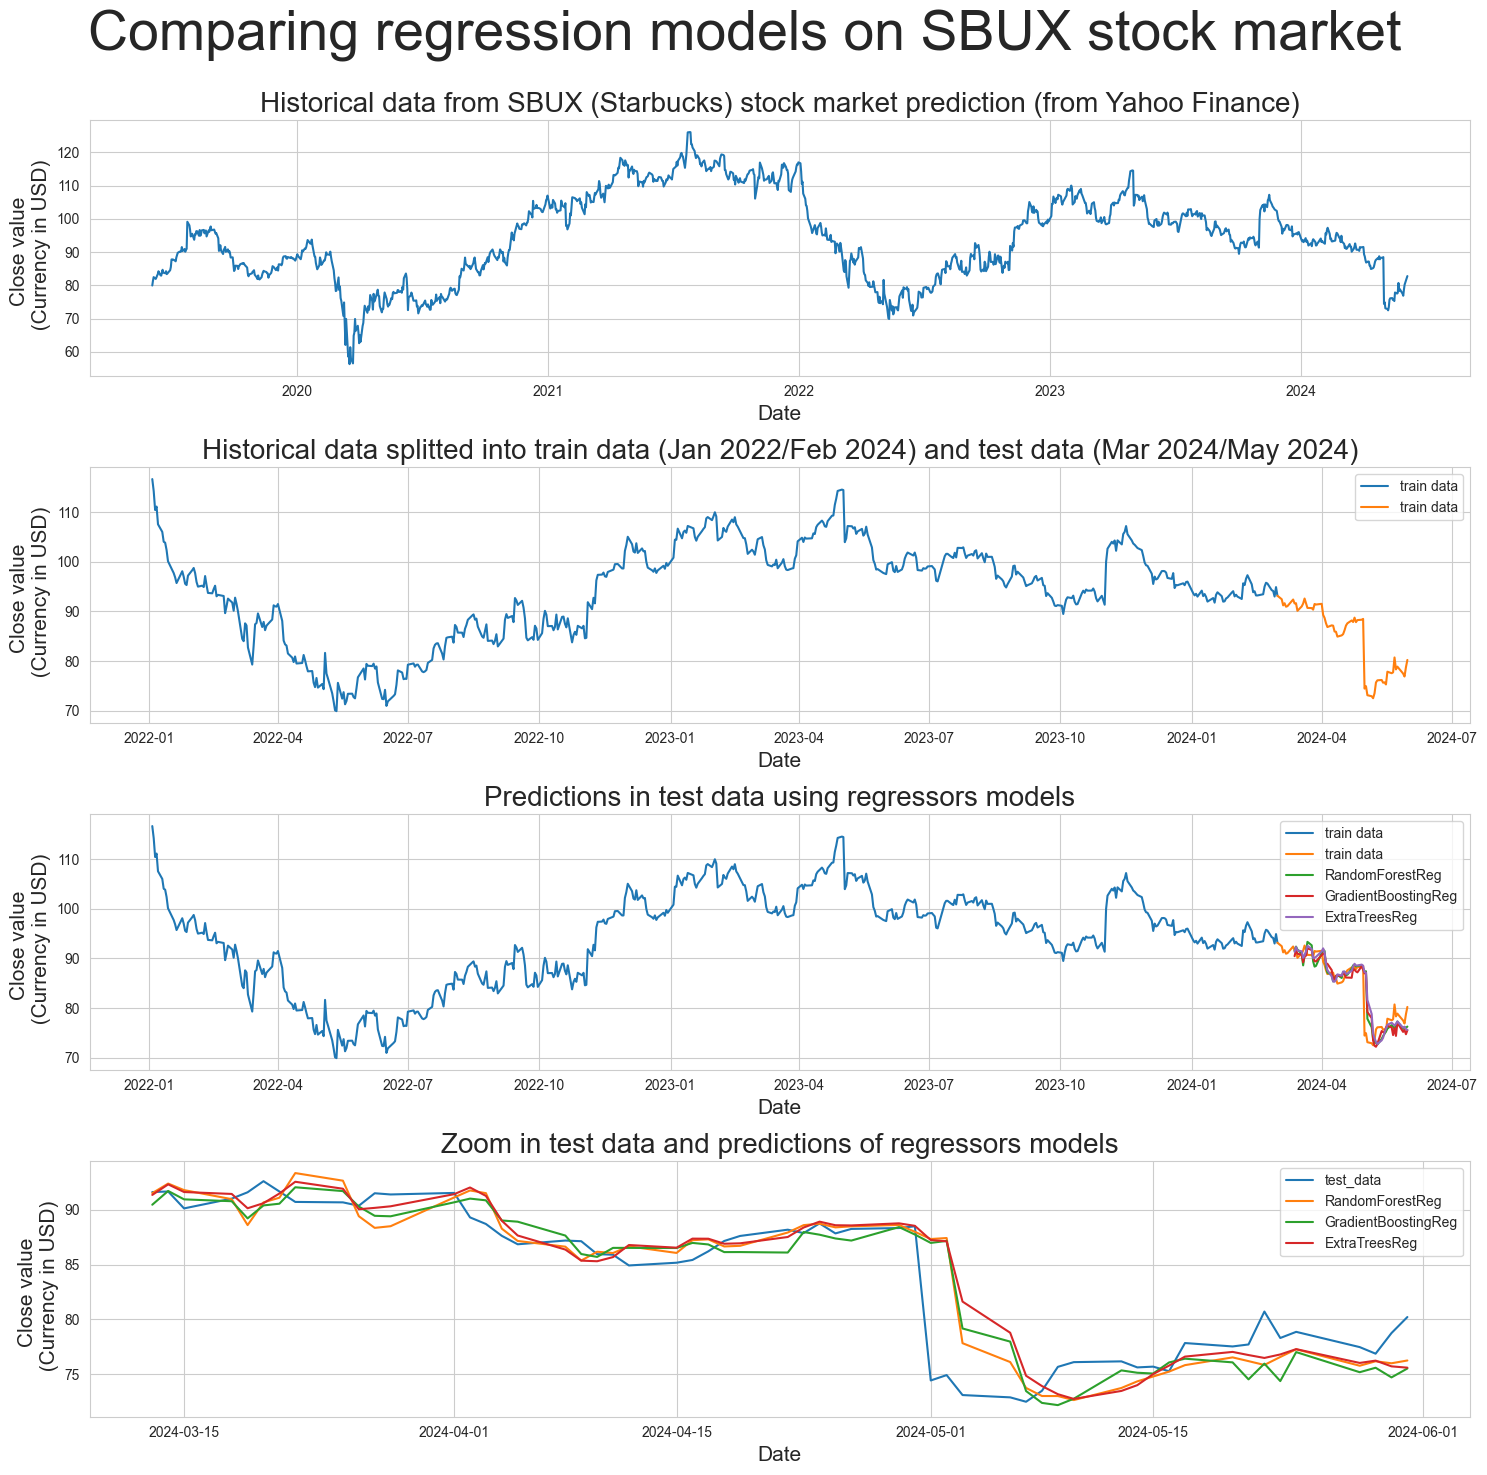

In [27]:
fig, axs = plt.subplots(4,1, figsize=(15,15), constrained_layout=True)

# Flatten the axis array for easy iteration
axs = axs.ravel()

axs[0].plot(sbux_data['Date'], sbux_data['Close'])
axs[0].set_title('\nHistorical data from SBUX (Starbucks) stock market prediction (from Yahoo Finance)', fontsize = 20)
axs[0].set_xlabel('Date', fontsize = 15)
axs[0].set_ylabel('Close value \n (Currency in USD)', fontsize = 15)

axs[1].plot(X_train['Date'], X_train['Close'], label='train data')
axs[1].plot(X_test['Date'], X_test['Close'], label='train data')
axs[1].set_title('Historical data splitted into train data (Jan 2022/Feb 2024) and test data (Mar 2024/May 2024)', fontsize = 20)
axs[1].set_xlabel('Date', fontsize = 15)
axs[1].set_ylabel('Close value \n (Currency in USD)', fontsize = 15)
axs[1].legend(loc='best')

axs[2].plot(X_train['Date'], X_train['Close'], label='train data')
axs[2].plot(X_test['Date'], X_test['Close'], label='train data')
#axs[2].plot(date_test, y_test, label = 'test_data')
for regressor_name, regressor in tqdm(regressors.items()):
    axs[2].plot(date_test, labels_per_regressor[regressor_name], label = regressor_name)
axs[2].legend(loc = 'best')
axs[2].set_title('Predictions in test data using regressors models', fontsize = 20)
axs[2].set_xlabel('Date', fontsize = 15)
axs[2].set_ylabel('Close value \n (Currency in USD)', fontsize = 15)


axs[3].plot(date_test, y_test, label = 'test_data')
for regressor_name, regressor in tqdm(regressors.items()):
    axs[3].plot(date_test, labels_per_regressor[regressor_name], label = regressor_name)
axs[3].legend(loc = 'best')
axs[3].set_title('Zoom in test data and predictions of regressors models', fontsize = 20)
axs[3].set_xlabel('Date', fontsize = 15)
axs[3].set_ylabel('Close value \n (Currency in USD)', fontsize = 15)

fig.suptitle('Comparing regression models on SBUX stock market', fontsize = 40)
plt.tight_layout()
plt.show()

# Plot metrics in a more fashion way

In [34]:
df_metrics

,Regressors,MSE,RMSE,MAE,RSE,RAE,R,R2
0,RandomForestReg,9.3248,3.0536,1.8943,3.1097,0.3196,0.8937,0.7766
1,GradientBoostingReg,9.9376,3.1524,2.0485,3.2102,0.3456,0.8849,0.7619
2,ExtraTreesReg,10.0371,3.1681,1.9052,3.2263,0.3215,0.8845,0.7595


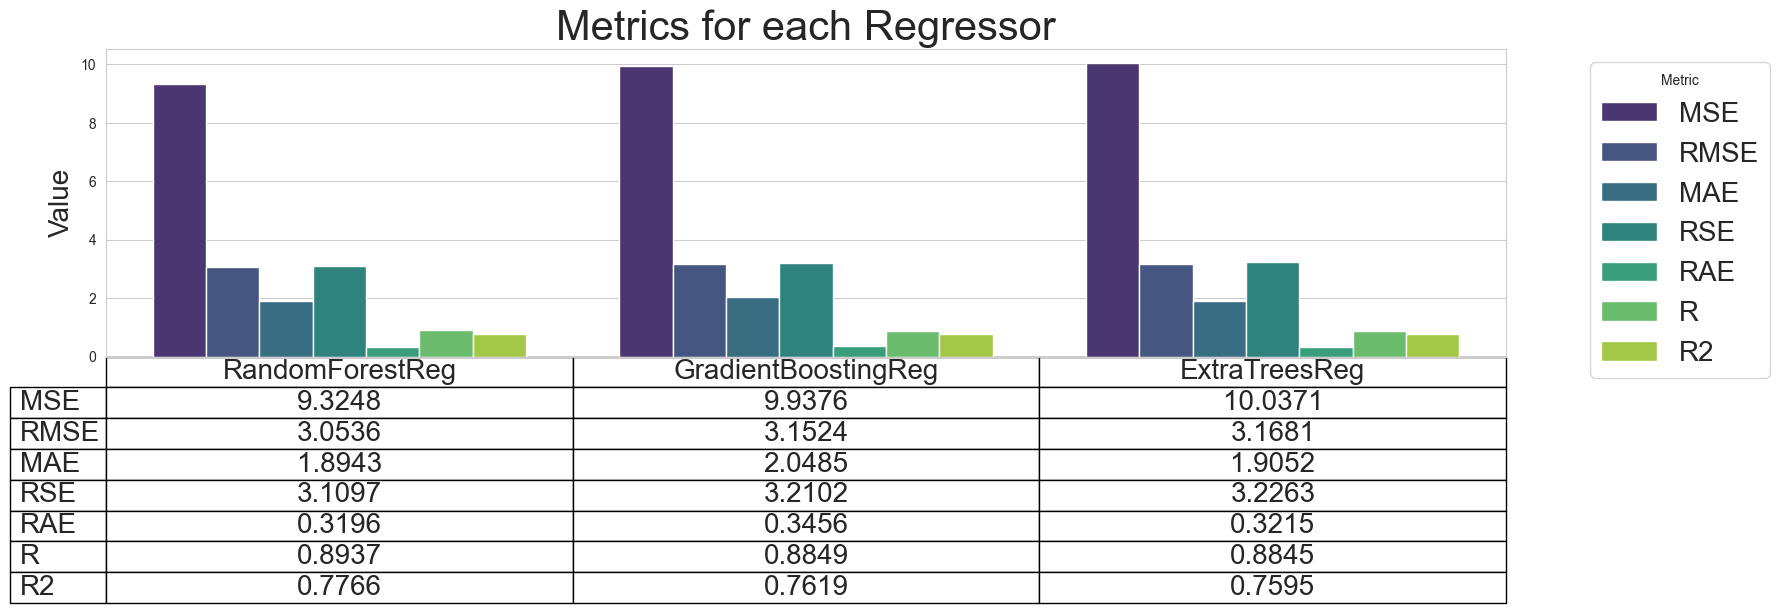

In [71]:
df = df_metrics.copy()
#df.drop(columns=['R','R2'], inplace=True)

# Reshape the dataframe to a long format for plotting
df_long = df.melt(id_vars='Regressors', var_name='Metric', value_name='Value')

# Plot the bar chart
plt.figure(figsize=(20, 4))
sns.barplot(x='Regressors', y='Value', hue='Metric', data=df_long, palette='viridis')

plt.title('Metrics for each Regressor', fontsize=30)
plt.xlabel('')
plt.ylabel('Value', fontsize=20)
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20)
plt.xticks([])

# Transpose the dataframe for the table
df_transposed = df.set_index('Regressors').T

# Add table below the chart
cell_text = df_transposed.values.tolist()
rows = df_transposed.index.tolist()
columns = df['Regressors'].tolist()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      colLabels=columns,
                      cellLoc='center',
                      loc='bottom',
                      fontsize=12)

# Increase the font size and padding for the table manually
for key, cell in the_table.get_celld().items():
    cell.set_fontsize(20)  # Set the desired font size
    cell.set_height(0.1)  # Increase cell height for more inner space
    #cell.set_width(0.1)    # Increase cell width for more inner space


# Adjust layout to make room for the table
#plt.subplots_adjust(left=0.2, bottom=0.3)
plt.subplots_adjust(left=0.2)

#plt.savefig('error_metrics.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Pairwise visualization

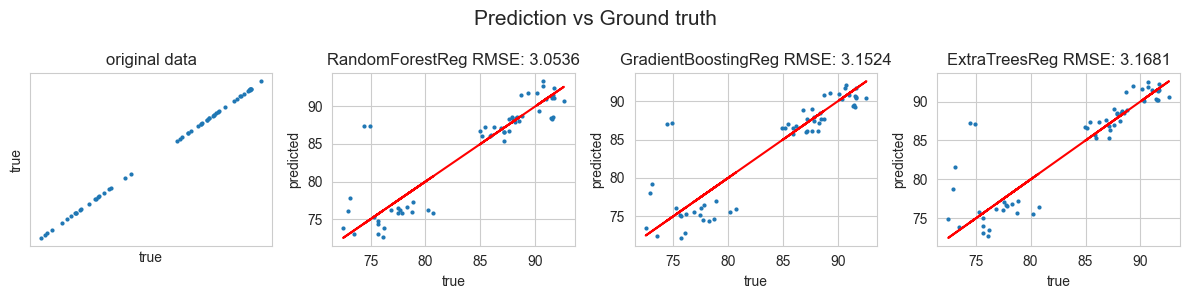

In [75]:
# Create a grid of pie charts
fig, axs = plt.subplots(1, 4, figsize=(12, 3))

# Flatten the axis array for easy iteration
axs = axs.ravel('A')

axs[0].scatter(y_test, y_test, s=4)
axs[0].set_title('original data')
axs[0].set_xlabel('true')
axs[0].set_ylabel('true')
axs[0].set_xticks([])
axs[0].set_yticks([])

#fig.delaxes(axs[1])

for i, regressors_name in enumerate(df_metrics['Regressors']):
    axs[i+1].plot(y_test, y_test, 'r')
    axs[i+1].scatter(y_test, labels_per_regressor[regressors_name], s=4)
    
    rmse_value_per_regressor = round(df_metrics.loc[df_metrics['Regressors'] == regressors_name, 'RMSE'].item(), 4)
    axs[i+1].set_title(regressors_name + ' RMSE: ' + str(rmse_value_per_regressor))
    axs[i+1].set_xlabel('true')
    axs[i+1].set_ylabel('predicted')
    #axs[i+1].set_xticks([])
    #axs[i+1].set_yticks([])

fig.suptitle('Prediction vs Ground truth', fontsize = 15)
plt.tight_layout()


#plt.savefig('actual_vs_predicted.png', dpi=300, bbox_inches='tight')
plt.show()

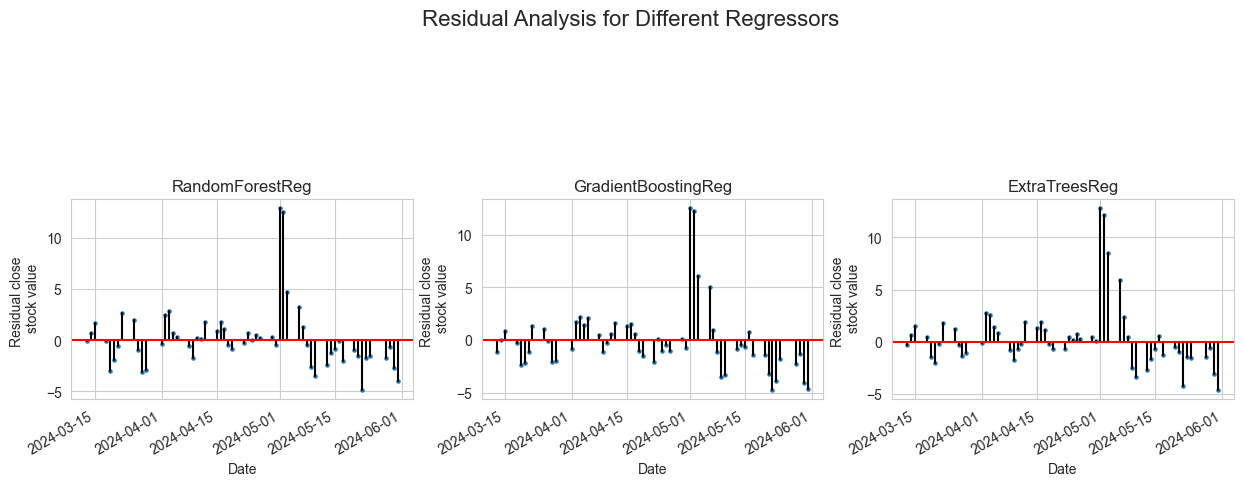

In [122]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs = axs.ravel()

for i, regressors_name in enumerate(df_metrics['Regressors']):
    residual = labels_per_regressor[regressors_name] - y_test
    for j, residual_value in enumerate(residual):
        axs[i].plot([date_test[j], date_test[j]], [0, residual_value], 'k')
    axs[i].scatter(date_test, residual, s=5)
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Residual close \n stock value')
    axs[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels
    axs[i].axhline(y=0, color='r', linestyle='-',)
    axs[i].set_title(regressors_name)


# Ensure date formatting for the x-axis is correct
fig.autofmt_xdate()

fig.subplots_adjust(top=.6)
fig.suptitle('Residual Analysis for Different Regressors \n \n \n ', fontsize=16)

plt.show()
